In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("2009.xlsx")

In [4]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2009,17193,224,38,3556
1,2009,17224,407,16,3556
2,2009,17958,214,15,3498
3,2009,17997,260,15,3562
4,2009,18021,68,26,3557
...,...,...,...,...,...
1862,2009,17385,9,19,3543
1863,2009,17506,99,41,3531
1864,2009,17293,374,26,3519
1865,2009,17663,403,20,3531


In [5]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1867, 5)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1867 non-null   int64
 1   Maximum length (m))  1867 non-null   int64
 2   Recession(m),        1867 non-null   int64
 3   Rate/yr(m)           1867 non-null   int64
 4   Snout altitude (m)   1867 non-null   int64
dtypes: int64(5)
memory usage: 73.1 KB


In [7]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [8]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  71
Number  of instances of models:  1867


In [9]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [10]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [11]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2009,17193,224,38,3556
1,2009,17224,407,16,3556
2,2009,17958,214,15,3498
3,2009,17997,260,15,3562
4,2009,18021,68,26,3557


In [12]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0130,-0.0002,0.0330
"Recession(m),",NaN,-0.0130,1.0000,-0.0092,-0.0035
Rate/yr(m),NaN,-0.0002,-0.0092,1.0000,-0.0241
Snout altitude (m),NaN,0.0330,-0.0035,-0.0241,1.0000


In [13]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Snout altitude (m)     0.0330
Rate/yr(m)            -0.0002
Recession(m),         -0.0130
Year                      NaN
Name: Maximum length (m)), dtype: float64

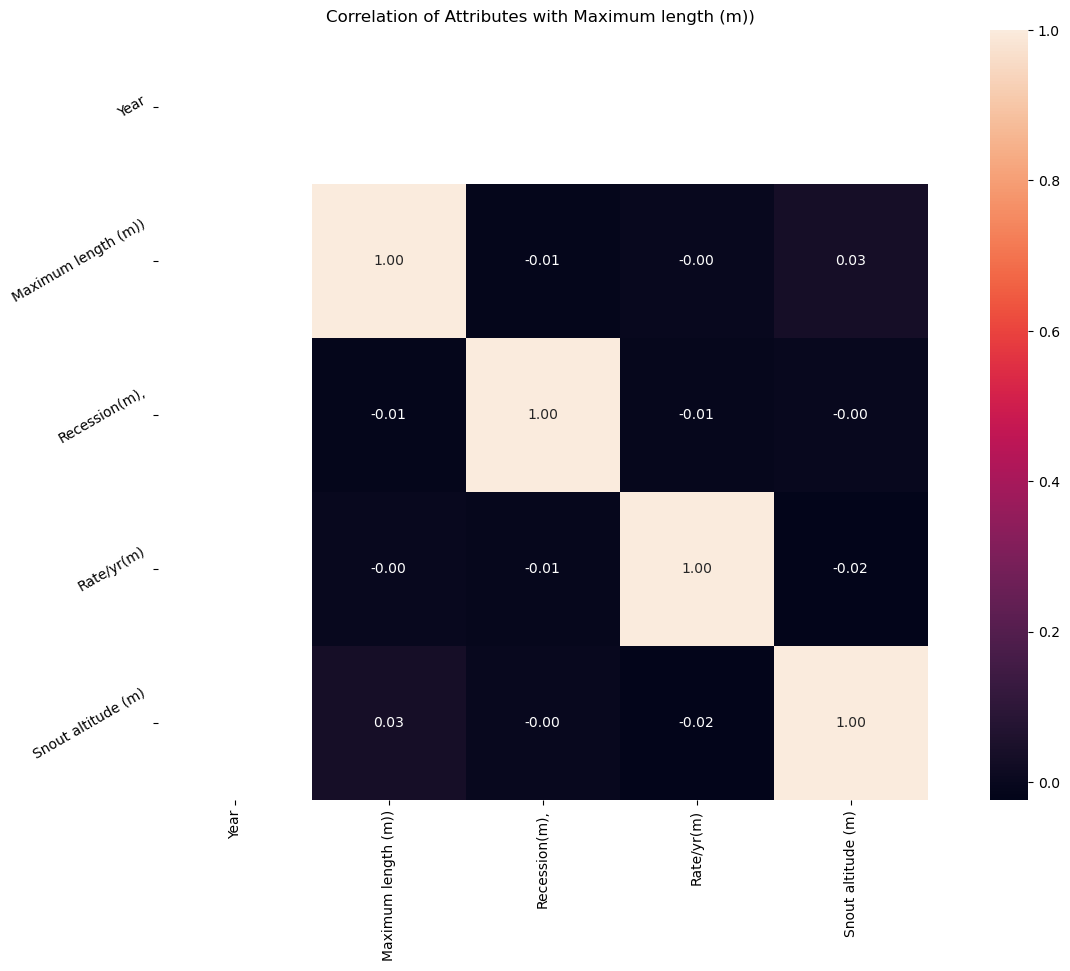

In [14]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [15]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [16]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,867.0000","1,867.0000","1,867.0000","1,867.0000","1,867.0000"
mean,"2,009.0000","17,555.7729",216.2373,27.8581,"3,531.9395"
std,0.0000,296.9820,128.6360,8.4739,20.4396
min,"2,009.0000","17,035.0000",0.0000,13.0000,"3,497.0000"
25%,"2,009.0000","17,301.5000",102.0000,21.0000,"3,514.0000"
50%,"2,009.0000","17,556.0000",211.0000,28.0000,"3,532.0000"
75%,"2,009.0000","17,819.5000",327.0000,35.0000,"3,549.0000"
max,"2,009.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2009   1.0000
Name: Year, dtype: float64

79    0.0059
180   0.0059
22    0.0059
143   0.0054
65    0.0048
       ...  
376   0.0005
264   0.0005
250   0.0005
81    0.0005
382   0.0005
Name: Recession(m),, Length: 430, dtype: float64

28   0.0423
34   0.0380
33   0.0375
19   0.0375
40   0.0370
32   0.0364
24   0.0364
31   0.0359
29   0.0359
35   0.0354
41   0.0348
22   0.0348
27   0.0348
30   0.0343
26   0.0343
39   0.0337
42   0.0337
14   0.0332
23   0.0332
37   0.0327
16   0.0321
15   0.0321
25   0.0316
36   0.0316
20   0.0311
21   0.0289
13   0.0273
18   0.0257
38   0.0246
17   0.0230
Name: Rate/yr(m), dtype: float64

3530   0.0241
3501   0.0220
3557   0.0187
3538   0.0187
3555   0.0182
        ...  
3566   0.0102
3563   0.0096
3523   0.0096
3529   0.0091
3553   0.0086
Name: Snout altitude (m), Length: 71, dtype: float64



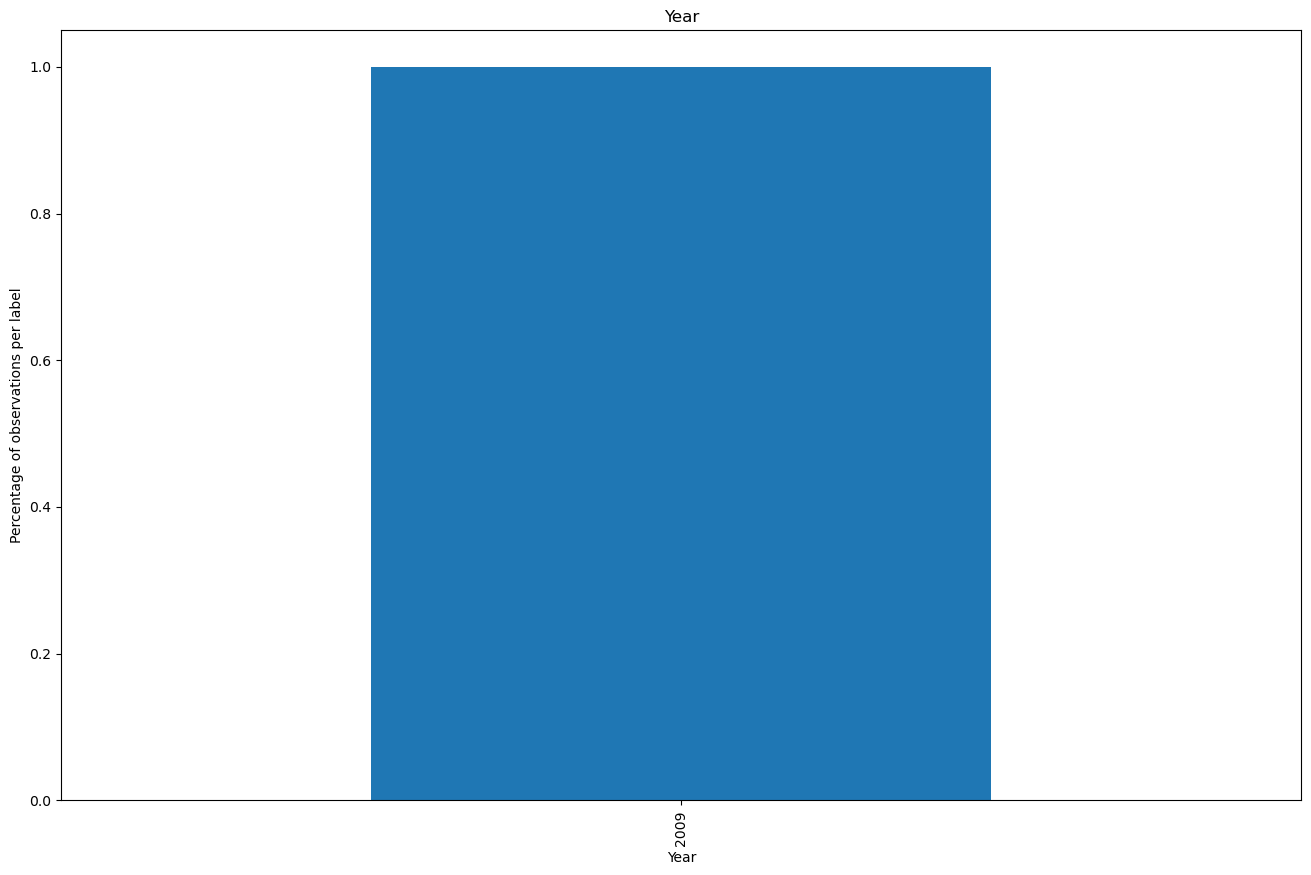

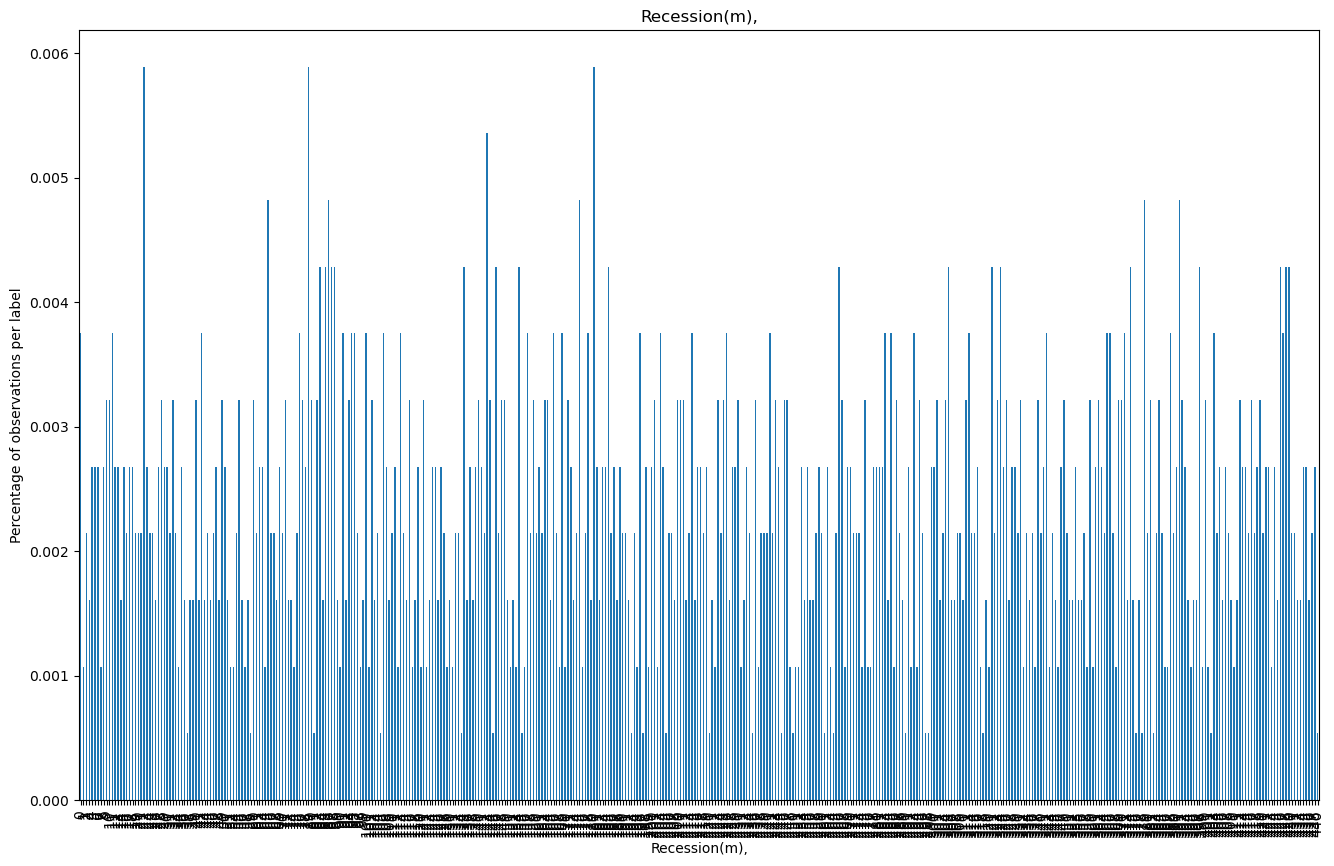

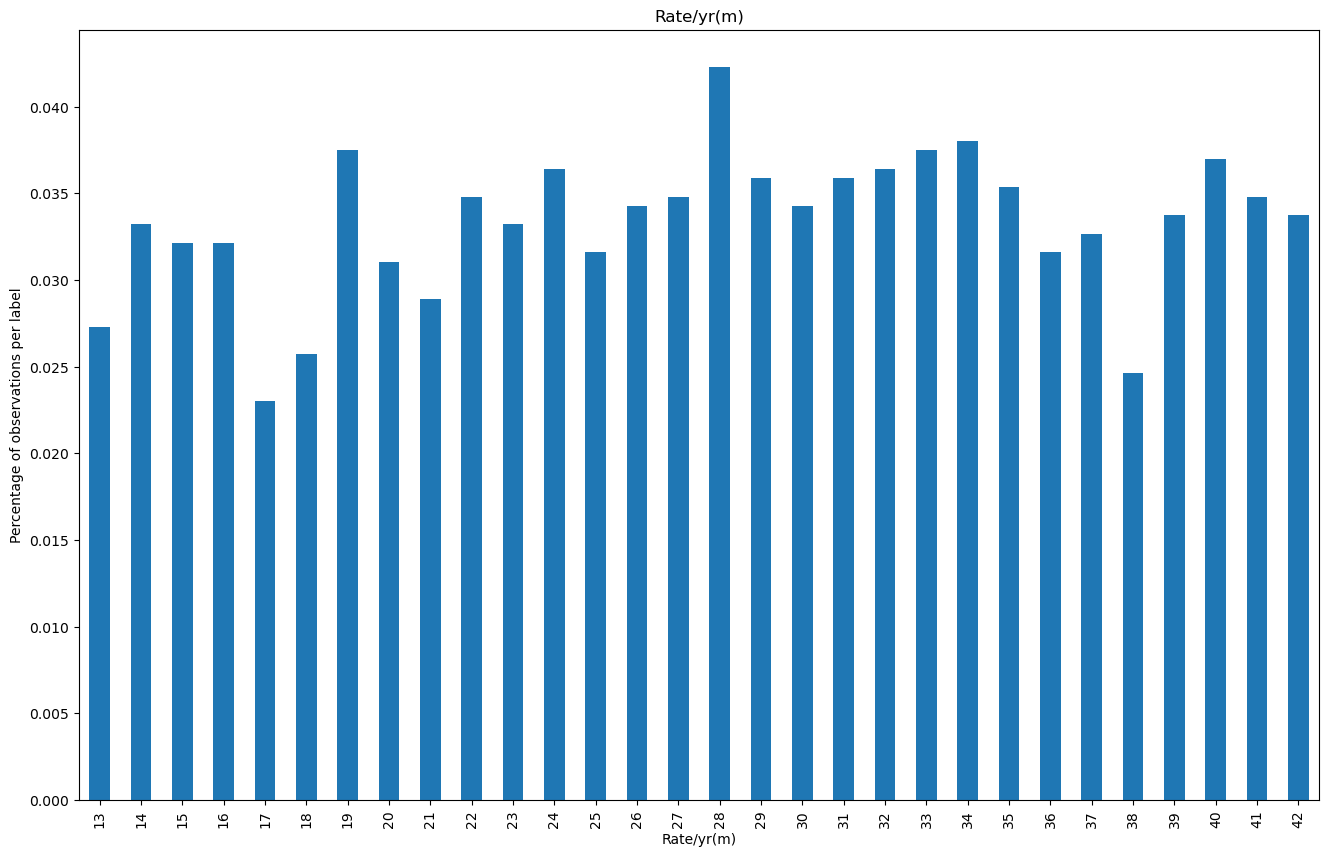

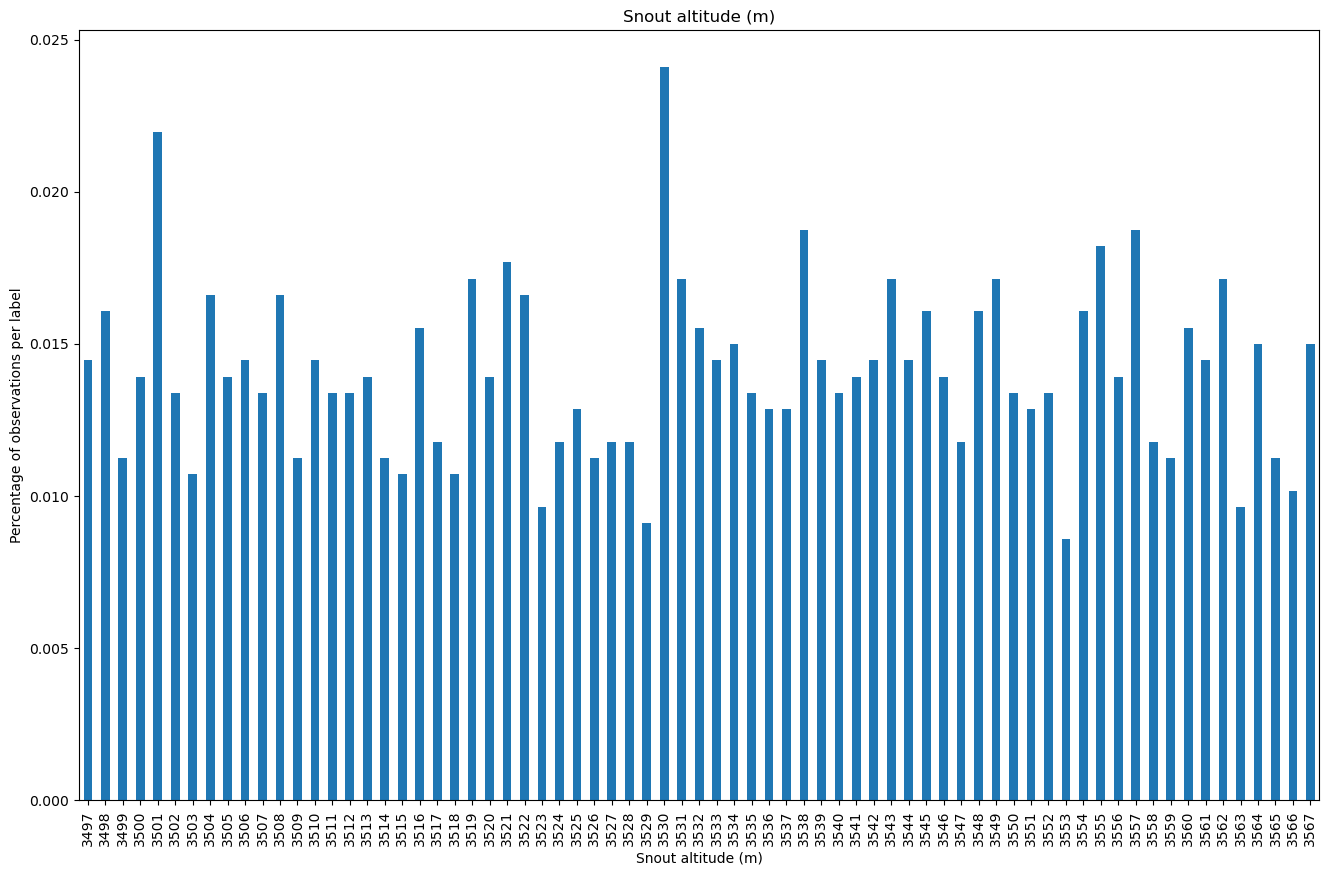

In [18]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()